In [7]:
from jax import grad, jit
import optax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='0', ylabel='y'>

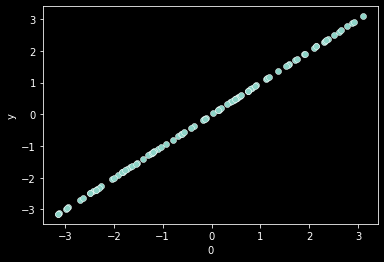

In [8]:
X_raw = np.random.uniform(low=-3.15, high=3.15, size=100)
# y = np.sin(X_raw)
y = X_raw
df = pd.DataFrame(X_raw)
df['bias'] = 1
df['y'] = y
X = df[[0, 'bias']].values
sns.scatterplot(x=0, y="y", data=df)

In [9]:
def f(X, W):
    v = X @ W
    return sigmoid(v)

def sigmoid(v):
    return 1 / jnp.e**-(v)

def g(X, W):
    return X @ W


def rmse_loss(X, W, y, fn):
    y_hat = fn(X, W)
    return jnp.sqrt(sum((y-y_hat)**2) / len(y))

loss = lambda W, X, y: rmse_loss(X, W, y, g)


learning_rate = .01
optimizer = optax.adam(learning_rate) 
params = jnp.zeros(X.shape[1])

opt_state = optimizer.init(params) 

for i in range(100):
    grads = jit(grad(loss))(params, X,  y)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

[9.9913836e-01 1.4109421e-04]


<AxesSubplot:>

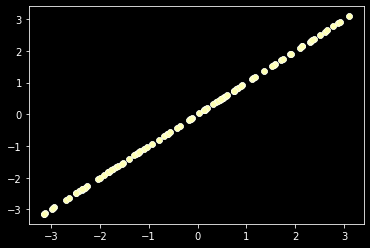

In [10]:
print(params)
sns.scatterplot(x=X.T[0], y=y)
sns.scatterplot(x=X.T[0], y=g(X, params))